## Specifying question
- 1. Is there a difference between the cars taken  during a weekend and during those taken during a weekday?
- 2. Is there a difference between the cars returned during the weekends and those returned during a weekday?

## Setting Hypothesis
**Question 1**
- Ho: There is no difference between the cars taken during a weekday and those taken during the weekend
- Ha: There is a difference between the cars taken during a weekday and those taken during a weekend

**Confidence level
a = 0.05

**Question2**
- Ho: There is no difference between the cars returned during a weekday and those returned during the weekend
- Ha: There is a difference between the cars returned during a weekday and those returned during a weekend

**Confidence level
a = 0.05

## 1.0 Importing necessary libraries

In [ ]:
# importing pandas
import pandas as pd

# Importing numpy
import numpy as np

# Importing matplotlib
import matplotlib as plt

# importing pyplot
from matplotlib import pyplot as plt

# Importing seaborn
import seaborn as sns

# importing scipy stats
import scipy.stats as stats

# Importing norm
from scipy.stats import norm

# Importing xlrd
import xlrd

# Importing datetime
import datetime

# Import math
import math

## 2.0 loading dataframe

In [ ]:
# Specifying url
url = 'http://bit.ly/DSCoreAutolibDatasetGlossary'

# Loading the variable descriptions of the autolib dataframe
variables_definitions = pd.read_excel(url)

In [ ]:
# Specifying url
url = 'http://bit.ly/DSCoreAutolibDataset'

# loading autolib dataframe
autolib_df = pd.read_csv(url)

## 3.0 Preview the data

### 3.1 <font color="green">Variable Definitions</font>

In [ ]:
# Previewing the records in the dataframe with autolib dataframe variable definitions
variables_definitions

Column name                                        explanation
0              Postal code                 postal code of the area (in Paris)
1                     date                        date of the row aggregation
2      n_daily_data_points  number of daily data poinst that were availabl...
3                dayOfWeek     identifier of weekday (0: Monday -> 6: Sunday)
4                 day_type                                 weekday or weekend
5       BlueCars_taken_sum    Number of bluecars taken that date in that area
6    BlueCars_returned_sum  Number of bluecars returned that date in that ...
7         Utilib_taken_sum      Number of Utilib taken that date in that area
8      Utilib_returned_sum   Number of Utilib returned that date in that area
9      Utilib_14_taken_sum  Number of Utilib 1.4 taken that date in that area
10  Utilib_14_returned_sum  Number of Utilib 1.4 returned that date in tha...
11         Slots_freed_sum  Number of recharging slots released that date ...
12         Slots_taken_sum  Number of rechargign slots taken that date in ...

### 3.2 <font color="green">Autolib dataframe</font>

In [ ]:
# Determining the number of records in autolib dataframe
autolib_df.shape

(16085, 13)

Autolib dataframe has;
- 16085 rows
- 13 columns

In [ ]:
# Previewing first five records of the autolib dataframe
autolib_df.head()

Postal code      date  n_daily_data_points  dayOfWeek day_type  \
0        75001  1/1/2018                 1440          0  weekday   
1        75001  1/2/2018                 1438          1  weekday   
2        75001  1/3/2018                 1439          2  weekday   
3        75001  1/4/2018                 1320          3  weekday   
4        75001  1/5/2018                 1440          4  weekday   

   BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
0                 110                    103                 3   
1                  98                     94                 1   
2                 138                    139                 0   
3                 104                    104                 2   
4                 114                    117                 3   

   Utilib_returned_sum  Utilib_14_taken_sum  Utilib_14_returned_sum  \
0                    2                   10                       9   
1                    1                    8                       8   
2                    0                    2                       2   
3                    2                    9                       8   
4                    3                    6                       6   

   Slots_freed_sum  Slots_taken_sum  
0               22               20  
1               23               22  
2               27               27  
3               25               21  
4               18               20

In [ ]:
# Previewing last five records of the autolib dataframe
autolib_df.tail()

Postal code       date  n_daily_data_points  dayOfWeek day_type  \
16080        95880  6/15/2018                 1440          4  weekday   
16081        95880  6/16/2018                 1440          5  weekend   
16082        95880  6/17/2018                 1440          6  weekend   
16083        95880  6/18/2018                 1440          0  weekday   
16084        95880  6/19/2018                 1370          1  weekday   

       BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
16080                  15                     10                 0   
16081                  19                     19                 0   
16082                  33                     35                 1   
16083                  11                     14                 3   
16084                   2                      2                 2   

       Utilib_returned_sum  Utilib_14_taken_sum  Utilib_14_returned_sum  \
16080                    0                    2                       3   
16081                    0                    2                       1   
16082                    1                    0                       0   
16083                    5                    2                       2   
16084                    1                    0                       0   

       Slots_freed_sum  Slots_taken_sum  
16080                0                0  
16081                0                0  
16082                0                0  
16083                0                0  
16084                0                0

In [ ]:
# Checking whether each column has an appropriate datatype
autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

- The date column in tha autolib dataframe has the wrong data type; Object instead of date

In [ ]:
# Preview naming of columns
autolib_df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

- 11/13 ('n_daily_data_points', 'dayOfWeek', 'day_type' 'BlueCars_taken_sum' 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum' 'Utilib_14_taken_sum' 'Utilib_14_returned_sum' 'Slots_freed_sum', 'Slots_taken_sum') columns need to be renamed

## 4.0 External datasource verification

- The data is verified by comparing postal code records in the autolib dataframe to a List of postal codes obtained from 

https://worldpostalcode.com/france/ile-de-france/paris

In [ ]:
# List of postal codes obtained from https://worldpostalcode.com/france/ile-de-france/paris

paris_postalcodes = (75000, 75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010, 
                     75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020)

In [ ]:
# postal codes in the autolib dataframe
autolib_postalcodes = autolib_df['Postal code'].unique()

In [ ]:
# paris postal codes list
paris_postalcodes = np.array([75000, 75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010, 
                     75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020])

# comparing postal codes in the autolib dataframe to those in the from worldpostcode website 
c = np.in1d(autolib_postalcodes,paris_postalcodes)

# Getting the counts of the boolean variables obtained after comparison
unique, counts = np.unique(c, return_counts=True)

# Result
result = np.column_stack((unique, counts)) 

# printing the result
print (result)

[[ 0 84]
 [ 1 20]]


- It can be concluded that the dataset is fairly accurate since it represented all postal codes in paris region
- The unaccounted postal codes were postal codes of different municipalities across France

## 5.0 Cleaning data

### 5.1 <font color="green">Outliers</font>

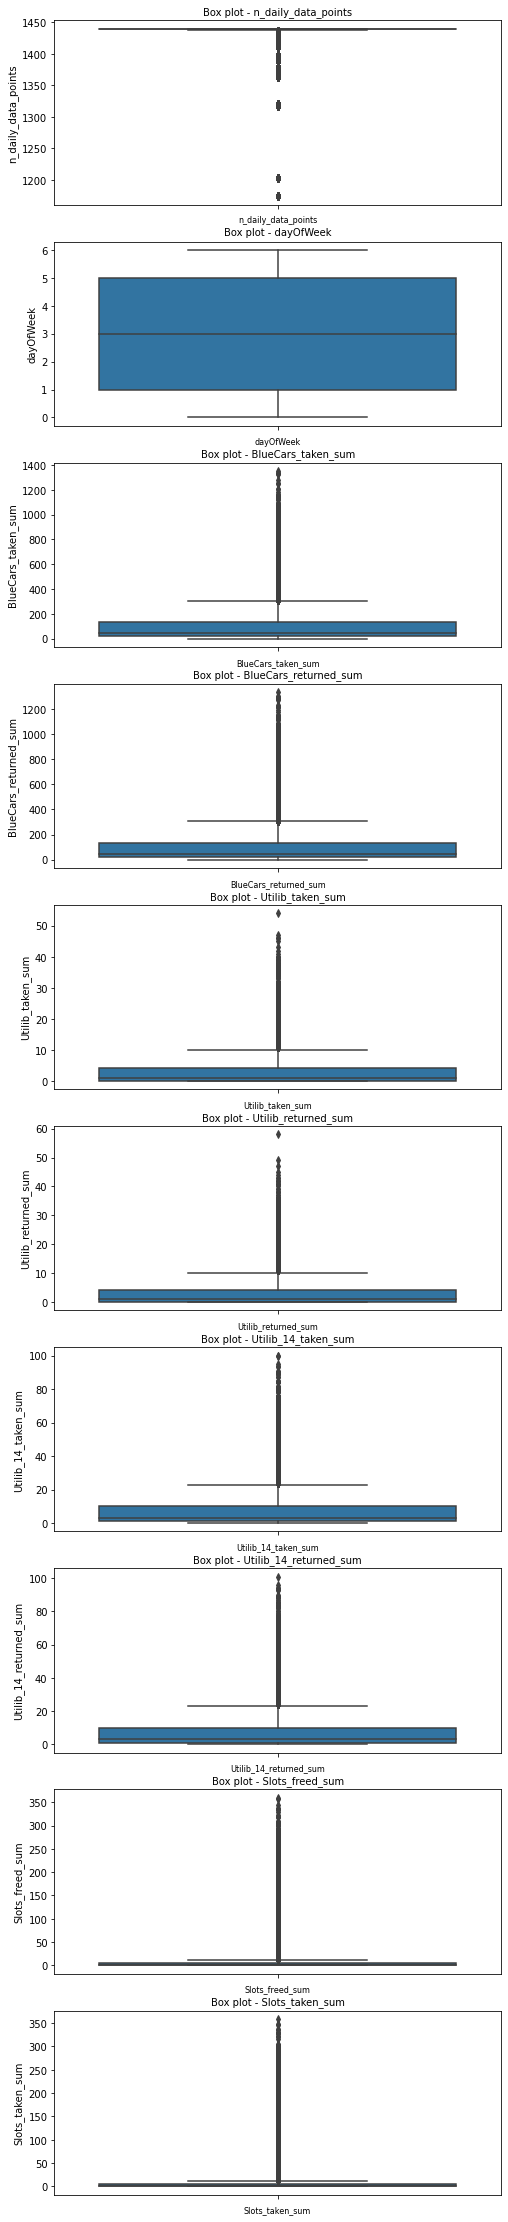

In [ ]:
# 1. Outliers
# Check for outliers
column_names = ['n_daily_data_points', 'dayOfWeek',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(len(column_names), figsize=(8,40))

for i, col_val in enumerate(column_names):
    sns.boxplot(y=autolib_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [ ]:
# adding index column
autolib_df['index1'] = autolib_df.index

# Dropping columns with string data ('Postal code', 'day_type', 'date') to allow the dropping of outliers
df = autolib_df.drop(['Postal code', 'day_type', 'date'], axis=1)

In [ ]:
# Removing outliers
autolib_df1 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# Size of df dataframe after outliers removed
autolib_df1.shape

# percentage of records lost during data cleaning

percent_lost = 1- len(autolib_df1) /len(autolib_df)
(autolib_df1.shape, percent_lost)

((14908, 11), 0.0731737643767485)

The number of columns in the dataframe after removing outliers;
- Columns 14908
- A total of 1177 records as outliers

The percentage of records lost as outliers was 7.317%

In [ ]:
# Creating dataframe with removed string data to join later with df dataframe 
# after outliers removed
postal = autolib_df[['Postal code','date', 'day_type', 'index1']]

In [ ]:
# Returning the data on postal codes dates and 
# joining dataframes on index
autolib_final = pd.merge(postal,autolib_df1,on='index1')

#dropping index1 column
autolib_final = autolib_final.drop(['index1'], axis=1)

### 5.2 <font color="green">Null values</font>

In [ ]:
# Checking for number of null values per column
autolib_final.isnull().sum()

Postal code               0
date                      0
day_type                  0
n_daily_data_points       0
dayOfWeek                 0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

- No null values in the autolib dataframe

### 5.3 <font color="green">Duplicate values</font>

In [ ]:
# Checking for duplicate values
autolib_final.duplicated().sum()

0

- No duplicate values in the autolib dataframe

### 5.4 <font color="green">Validity and Other anomalies</font>

In [ ]:
# Check column info
autolib_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14908 entries, 0 to 14907
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             14908 non-null  int64 
 1   date                    14908 non-null  object
 2   day_type                14908 non-null  object
 3   n_daily_data_points     14908 non-null  int64 
 4   dayOfWeek               14908 non-null  int64 
 5   BlueCars_taken_sum      14908 non-null  int64 
 6   BlueCars_returned_sum   14908 non-null  int64 
 7   Utilib_taken_sum        14908 non-null  int64 
 8   Utilib_returned_sum     14908 non-null  int64 
 9   Utilib_14_taken_sum     14908 non-null  int64 
 10  Utilib_14_returned_sum  14908 non-null  int64 
 11  Slots_freed_sum         14908 non-null  int64 
 12  Slots_taken_sum         14908 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


- Date is in string format instead of date

In [ ]:
# Converting date column to date Time
autolib_final['date'] = pd.to_datetime(autolib_final['date'])

In [ ]:
# Rename columns
autolib_final.rename(columns = {'date': 'Date', 'day_type': 'Day Type', 'n_daily_data_points': 'Daily Data Points', 'dayOfWeek': 'Day of Week',
       'BlueCars_taken_sum': 'Bluecars Taken Sum', 'BlueCars_returned_sum': 'Bluecars Returned Sum', 'Utilib_taken_sum': 'Utilib Taken Sum',
       'Utilib_returned_sum': 'Utilib Returned Sum', 'Utilib_14_taken_sum': 'Utilib-14 Taken Sum', 'Utilib_14_returned_sum': 'Utilib-14 Returned Sum',
       'Slots_freed_sum': 'Slots Freed Sum', 'Slots_taken_sum': 'Slots Taken Sum'}, inplace = True)


- The Autolib dataset is now clean without any anomalies, proper headings, and each column with proper headings

In [ ]:
# Records remaining after cleaning data
autolib_final.shape

(14908, 13)

- The cleaned data frame has 14908 columns and 13 rows.
- A total of 1177 records were lost which - represented 7.317% of the total data which is insignificant.


## 6.0 Univariant analysis

### 6.1 <font color="green">Numerical Analysis</font>

**Mean and Standard Deviation**

In [ ]:
# Describe the dataframe to get mean, median and standard deviations
autolib_final.describe()

Postal code  Daily Data Points   Day of Week  Bluecars Taken Sum  \
count  14908.000000       14908.000000  14908.000000        14908.000000   
mean   89492.557754        1435.973236      2.928897           95.746713   
std     7163.139833          12.797918      2.019238          124.891443   
min    75001.000000        1364.000000      0.000000            0.000000   
25%    92100.000000        1439.000000      1.000000           19.000000   
50%    92370.000000        1440.000000      3.000000           43.000000   
75%    93440.000000        1440.000000      5.000000          109.000000   
max    95880.000000        1440.000000      6.000000          682.000000   

       Bluecars Returned Sum  Utilib Taken Sum  Utilib Returned Sum  \
count           14908.000000      14908.000000         14908.000000   
mean               95.719077          2.777167             2.778240   
std               124.841005          3.929971             3.929878   
min                 0.000000          0.000000             0.000000   
25%                19.000000          0.000000             0.000000   
50%                43.000000          1.000000             1.000000   
75%               109.000000          4.000000             4.000000   
max               677.000000         21.000000            21.000000   

       Utilib-14 Taken Sum  Utilib-14 Returned Sum  Slots Freed Sum  \
count         14908.000000            14908.000000     14908.000000   
mean              6.547022                6.549168        14.030386   
std               8.685504                8.688350        34.813345   
min               0.000000                0.000000         0.000000   
25%               1.000000                1.000000         0.000000   
50%               3.000000                3.000000         0.000000   
75%               8.000000                8.000000         3.000000   
max              47.000000               47.000000       178.000000   

       Slots Taken Sum  
count     14908.000000  
mean         14.036423  
std          34.871027  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           3.000000  
max         179.000000

The means, standard deviation, medieans
- Daily Data Points
    - mean = 1435.97
    - std = 12.80
    - median = 1440.00
- Bluecars Taken Sum
    - mean = 95.75
    - std = 124.89
    - median = 43.00
- Bluecars Returned Sum
    - mean = 95.72
    - std = 124.84
    - median = 43.00	
- Utilib Taken Sum
    - mean = 2.78
    - std = 3.93
    - median = 1.00
- Utilib Returned Sum
    - mean = 2.78
    - std =3.93
    - median = 	1.00
- Utilib-14 Taken Sum
    - mean = 6.55
    - std = 8.69
    - median = 3.00
- Utilib-14 Returned Sum
    - mean = 6.55
    - std = 8.69
    - median= 3.00
- Slots Freed Sum
    - mean = 14.03
    - std = 34.81
    - median = 0.00
- Slots Taken Sum
    - mean = 14.04
    - std =34.87
    - median = 0.00

**Kurtosis**

In [ ]:
# Calculation of Kurtosis per variable
autolib_final.kurtosis(axis=0, skipna=True, level=None, numeric_only=None) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Postal code                0.160608
Daily Data Points         15.895344
Day of Week               -1.272464
Bluecars Taken Sum         3.273710
Bluecars Returned Sum      3.322364
Utilib Taken Sum           4.097898
Utilib Returned Sum        4.042522
Utilib-14 Taken Sum        3.894042
Utilib-14 Returned Sum     3.891969
Slots Freed Sum            6.142422
Slots Taken Sum            6.183390
dtype: float64

-  All variables aside from the day of the week variable had a positive skew. This implied that the variables had more tails than the normal distribution
- The day of the week had a negative kurtosis. This implied it had less tails than a normal distribution.

- *Postal codes skew is considered since it has no significant value to the analysis*

**Skewness**

In [ ]:
# Calculation of skewness per variable
autolib_final.skew(axis=0, skipna=True, level=None, numeric_only=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Postal code              -1.427153
Daily Data Points        -4.006906
Day of Week               0.045475
Bluecars Taken Sum        1.982997
Bluecars Returned Sum     1.991928
Utilib Taken Sum          2.038540
Utilib Returned Sum       2.036652
Utilib-14 Taken Sum       2.019348
Utilib-14 Returned Sum    2.019287
Slots Freed Sum           2.674625
Slots Taken Sum           2.680789
dtype: float64

- All columns aside from daily data points had a positive skew(skewwed to the right)
- The slots taken and slots returned variables had the largest skew to the right
- Daily data points had the most significant skew but to the right
- **Postal codes skew is considered since it has no significant value to the analysis*


### 6.2 <font color="green">Visualizations</font>

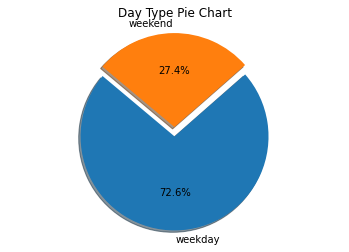

In [ ]:
# Pie chart plot for day type cars are hired or returned
# Getting value counts of weekends and weekdays
day_type = autolib_final['Day Type'].value_counts()

# Exploding one part of the pie chart
explode = (0, 0.1)

# Plotting our pie chart
plt.pie(day_type, explode = explode, labels = day_type.index, autopct = '%1.1f%%', shadow = True, startangle = 140)

# Specifying axis type
plt.axis('equal')

# Set title
plt.title('Day Type Pie Chart')

# Show plot
plt.show()

- Close to three times more cars are taken/returned during the week compared to the weeekend

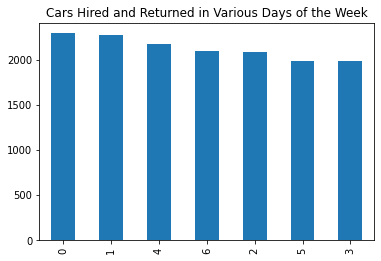

In [ ]:
# Bar chart representing the various days of the week
autolib_final['Day of Week'].value_counts().plot.bar(title='Cars Hired and Returned in Various Days of the Week')

- The most cars are taken/returned during on a weekday on the first day of the week(Day 0, Monday)
- The least cars are taken/returned on the sixth day of the week(Day 5, Saturday) a weekend

## 7.0 Bivariant Analysis

### 7.1 <font color="green">Visualizations</font>

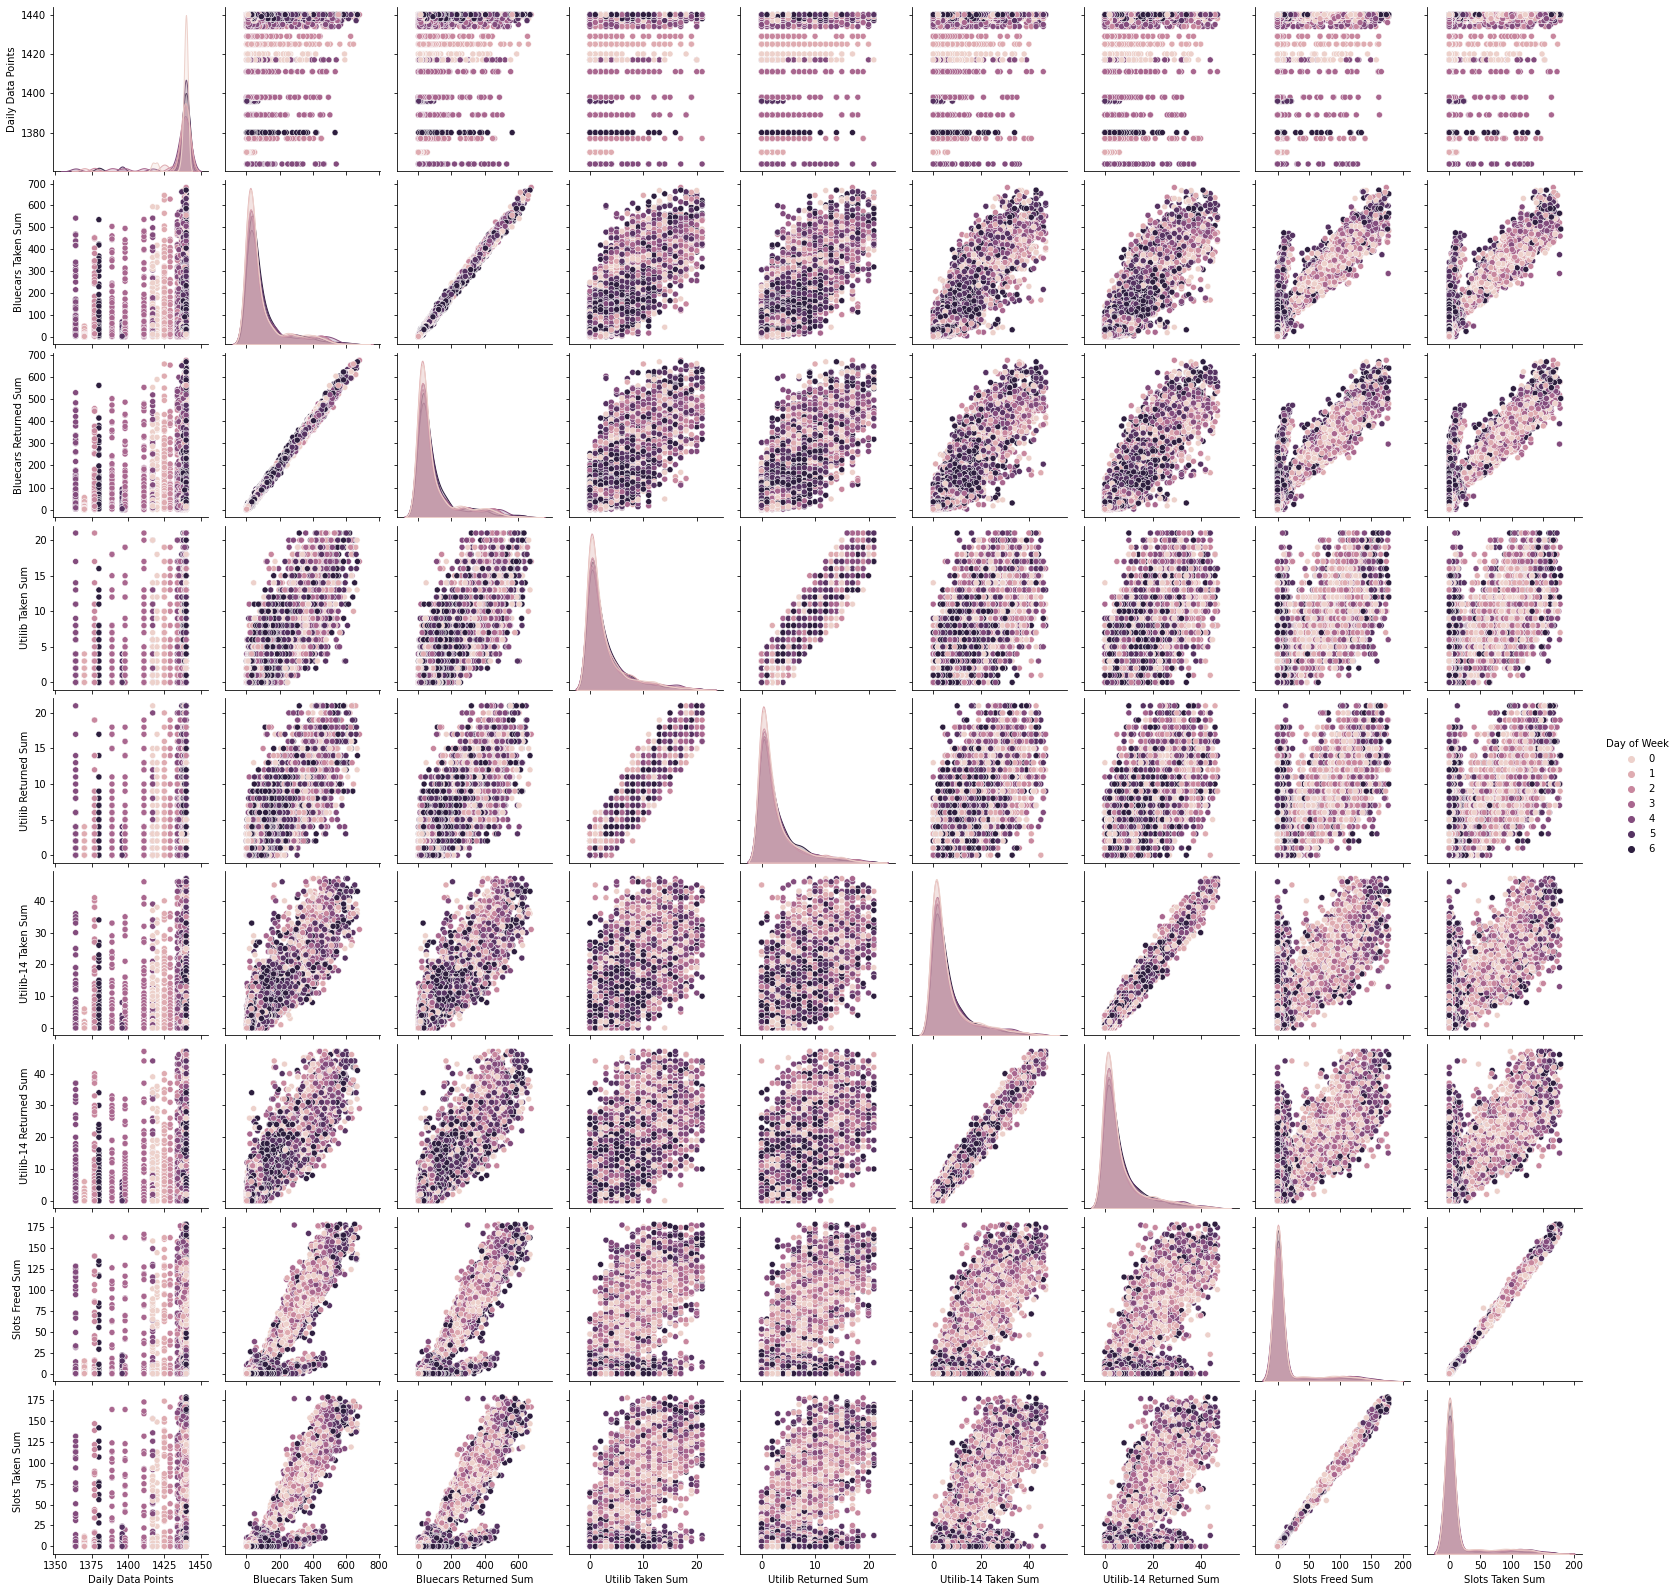

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(autolib_final[['Day Type', 'Daily Data Points', 'Day of Week',
       'Bluecars Taken Sum', 'Bluecars Returned Sum', 'Utilib Taken Sum',
       'Utilib Returned Sum', 'Utilib-14 Taken Sum', 'Utilib-14 Returned Sum',
       'Slots Freed Sum', 'Slots Taken Sum']], hue= 'Day of Week')
plt.show()

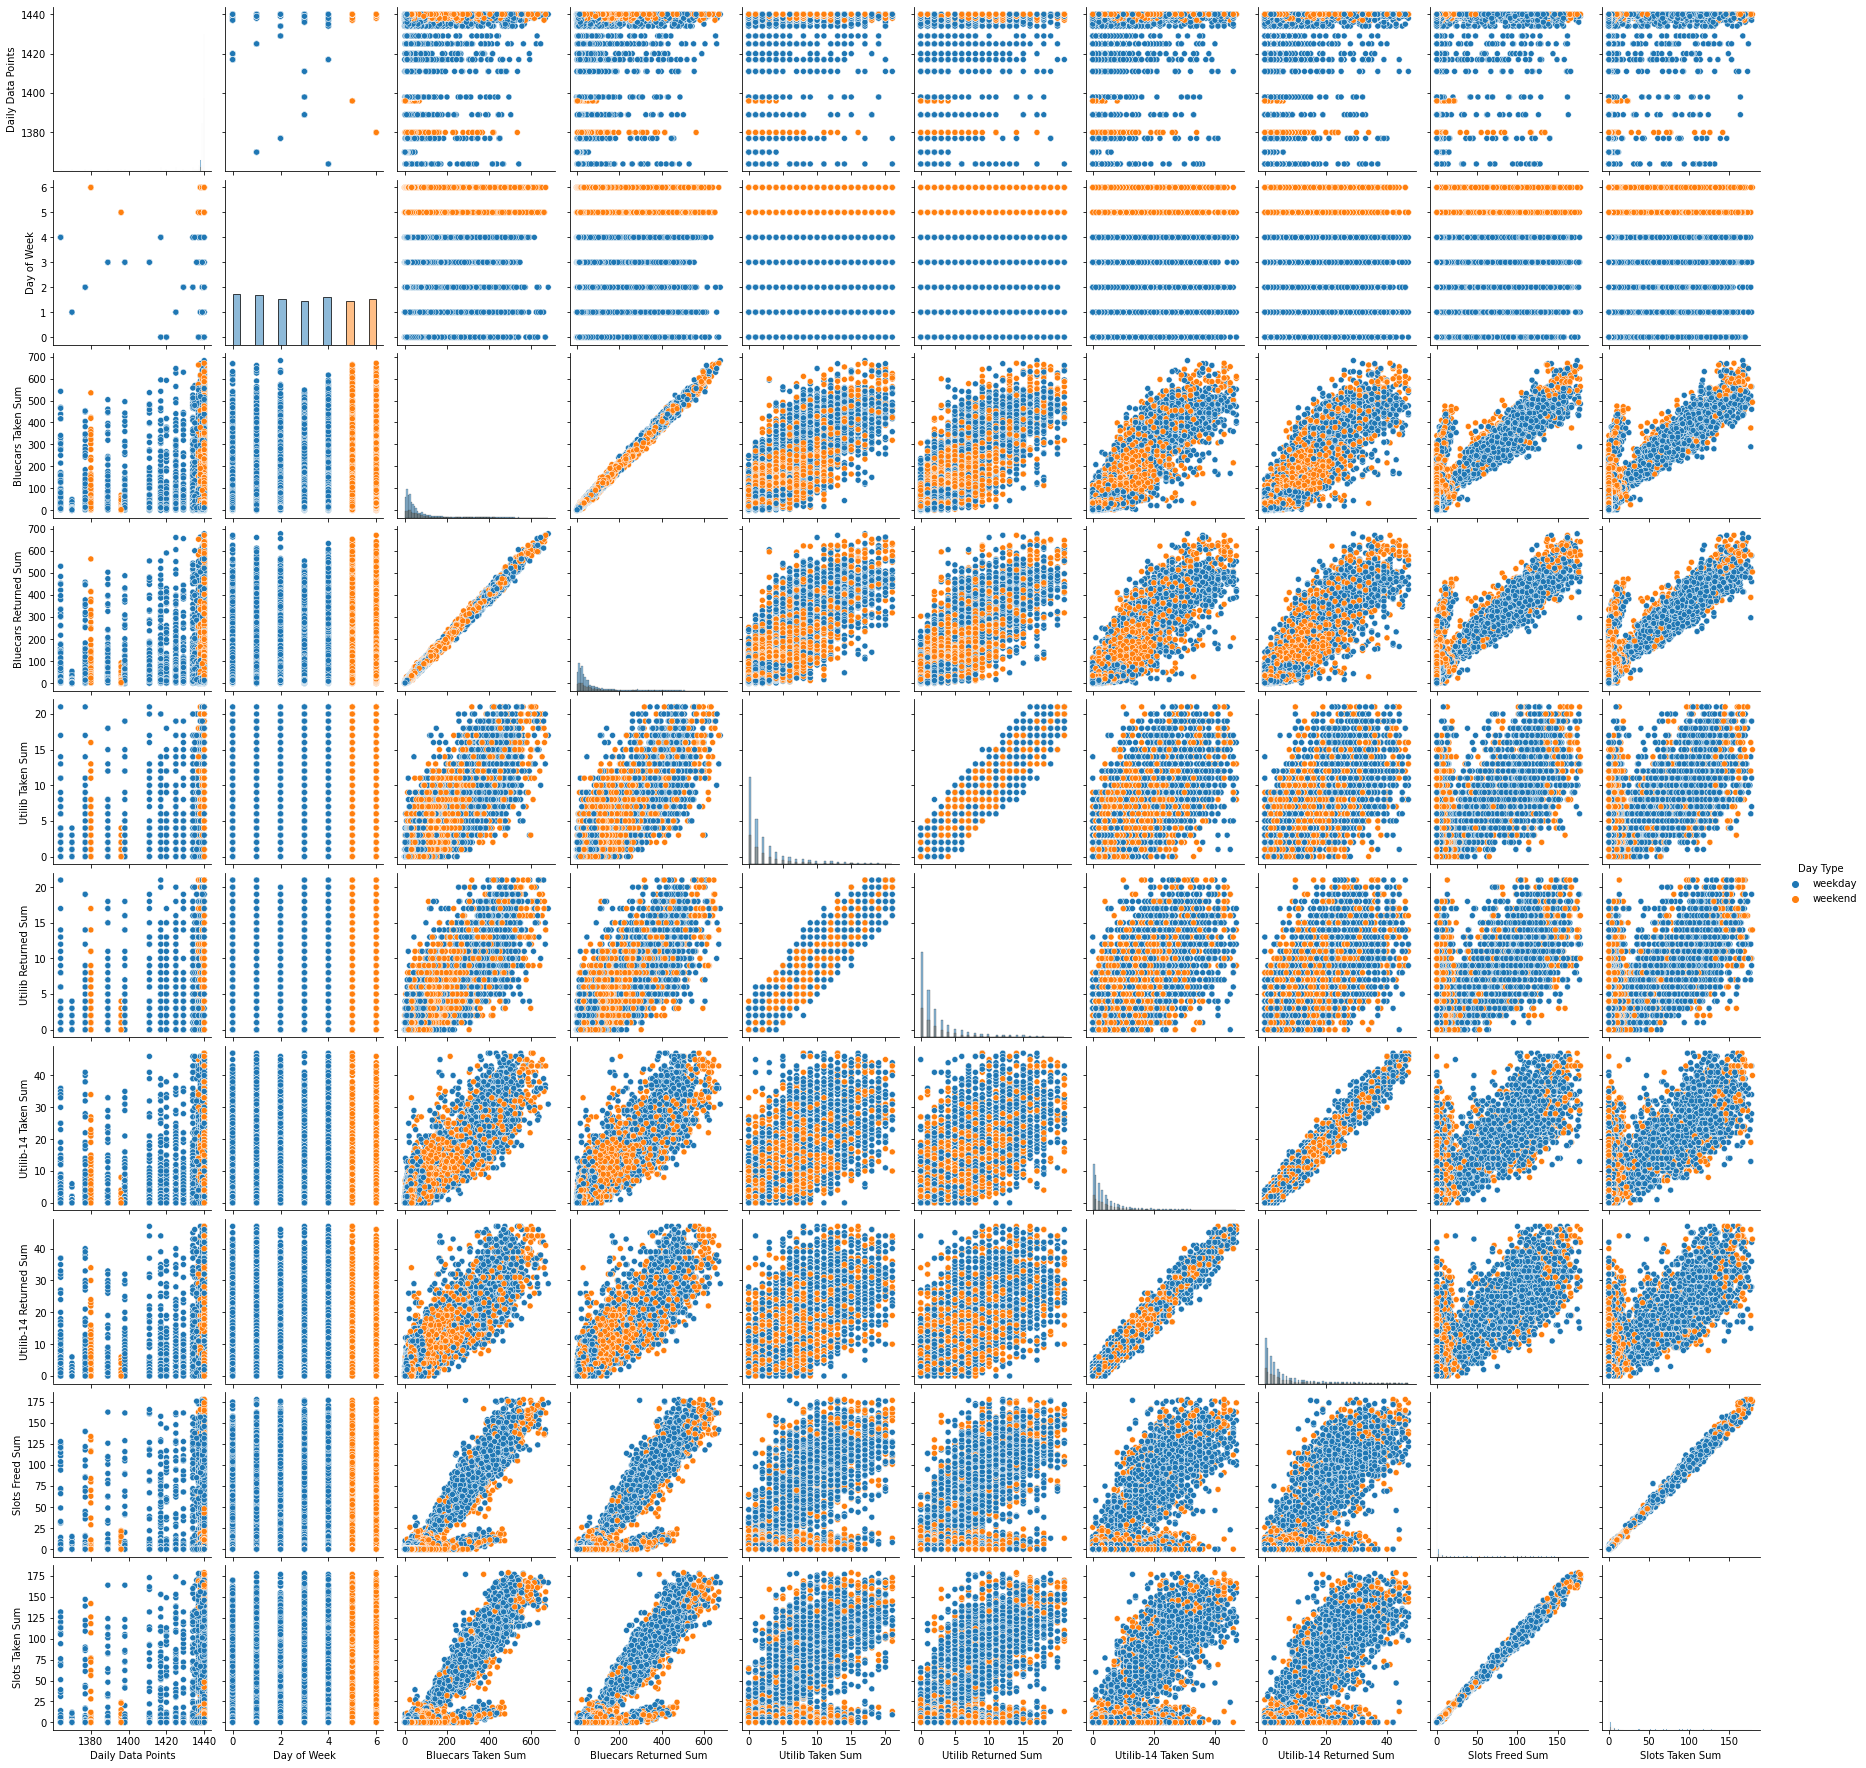

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(autolib_final[['Day Type', 'Daily Data Points', 'Day of Week',
       'Bluecars Taken Sum', 'Bluecars Returned Sum', 'Utilib Taken Sum',
       'Utilib Returned Sum', 'Utilib-14 Taken Sum', 'Utilib-14 Returned Sum',
       'Slots Freed Sum', 'Slots Taken Sum']], hue= 'Day Type', diag_kind = 'hist')
plt.show()

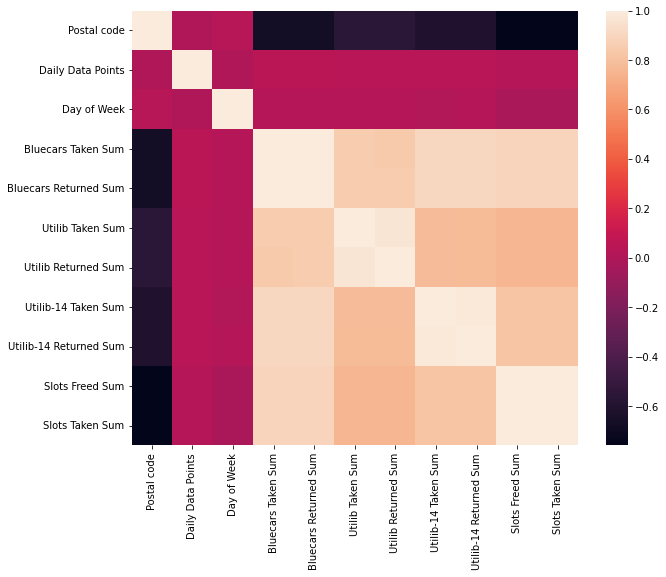

In [ ]:
# Correlation plot
f, ax = plt.subplots(figsize=(10, 8))
corr = autolib_final.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

- The following Variables in the autolib_final dataframe had a very high correlation greater than 0.6:
'Bluecars Taken Sum', 'Bluecars Returned Sum', 'Utilib Taken Sum', 'Utilib Returned Sum', 'Utilib-14 Taken Sum', 'Utilib-14 Returned Sum','Slots Freed Sum', 'Slots Taken Sum'

## 8.0 Hypothesis testing



### 5.1 <font color="green">Question 1</font>

In [ ]:
# Confidence level = 0.05
# Selecting data with Blue car, utilib, utilib-14 cars taken together with date, and type of day
autolib_taken = autolib_final[['Date', 'Day Type', 'Bluecars Taken Sum', 'Utilib Taken Sum', 'Utilib-14 Taken Sum']]

# Summing up vehicles taken in one column
autolib_taken['Total'] = autolib_taken.loc[:,['Bluecars Taken Sum', 'Utilib Taken Sum', 'Utilib-14 Taken Sum']].sum(axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# sampling the autolib_taken dataframe for 0.01 percent records
# Stratified Random samplying data
autolib_taken_sample = autolib_taken.groupby('Day Type', group_keys=False).apply(lambda x: x.sample(frac=0.01))
autolib_taken_sample['Day Type'].describe()

count         149
unique          2
top       weekday
freq          108
Name: Day Type, dtype: object

- 0.01 percent of the records have been choosen as our sample
- The day type data is propotional in the original and the sample datasets

In [ ]:
# Splitting the datframe to that with weekday records only and that with weekend records only
# Weekdays data only
autolib_taken_weekday = autolib_taken_sample.loc[autolib_taken_sample['Day Type'] == 'weekday']

# Weekend data only
autolib_taken_weekend = autolib_taken_sample.loc[autolib_taken_sample['Day Type'] == 'weekend']

In [ ]:
# determining t_statistic and p_value
stats.ttest_ind(autolib_taken_weekday['Total'], autolib_taken_weekend['Total'], equal_var=True)

Ttest_indResult(statistic=0.42106995493996985, pvalue=0.674318997747228)

Result;
- T-statistic = 0.91503
- P-value = 0.36167
- Fail to reject the null hypothesis.
- The difference in cars taken over the weekend and during weekdays was not statistically significant
- There is no significant difference between the cars taken during a weekday compared to those take during a weekend (p = 0.36167)



**Point Estimator**

In [ ]:
# calculate how much the estimated sample mean differs from the main mean 
differences_mean = autolib_taken['Total'].mean() - autolib_taken_sample['Total'].mean()

# printing mean of original data set and the difference of mean from original and sampled dataset
(autolib_taken['Total'].mean(), differences_mean)

(105.0709015293802, 0.11788139515201124)

- The mean of the dataset with data on car pickups before sampling was 105.071
- Based on a sample of 149 pickups our estimator underestimates the true mean by 11.427 
- We can conclude that we can get a fairly accurate estimate of a large population from a fairly small subset.

**Confidence Interval**

In [ ]:
# Constructing confidence interval of car pickups
# Calculating sample mean of final data
taken_mean = autolib_taken['Total'].mean()
taken_mean

# Finding sample size
taken_size = autolib_taken['Total'].shape[0]
taken_size

# Finding the standard error of the mean of height 
#
std_error = autolib_taken['Total'].std() / np.sqrt(taken_size)
std_error

# Calculating the 95% Confidence Interval for mean data 
lower, upper =stats.norm.interval(0.95, loc=taken_mean, scale=std_error)

print(f'lower limit {lower} and upper limit {upper}')

lower limit 102.88488483425692 and upper limit 107.25691822450347


### 5.1 <font color="green">Question 2</font>

In [ ]:
autolib_final.columns

Index(['Postal code', 'Date', 'Day Type', 'Daily Data Points', 'Day of Week',
       'Bluecars Taken Sum', 'Bluecars Returned Sum', 'Utilib Taken Sum',
       'Utilib Returned Sum', 'Utilib-14 Taken Sum', 'Utilib-14 Returned Sum',
       'Slots Freed Sum', 'Slots Taken Sum'],
      dtype='object')

In [ ]:
# Confidence level = 0.05
# Selecting data with Blue car, utilib, utilib-14 cars taken together with date, and type of day
autolib_returned = autolib_final[['Date', 'Day Type', 'Bluecars Returned Sum', 'Utilib Returned Sum', 'Utilib-14 Returned Sum']]

# Summing up vehicles taken in one column
autolib_returned['Total'] = autolib_returned.loc[:,['Bluecars Returned Sum', 'Utilib Returned Sum', 'Utilib-14 Returned Sum']].sum(axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# sampling the autolib_taken dataframe for 0.01 percent records
# Stratified Random samplying data
autolib_returned_sample = autolib_returned.groupby('Day Type', group_keys=False).apply(lambda x: x.sample(frac=0.01))
autolib_returned_sample['Day Type'].describe()

count         149
unique          2
top       weekday
freq          108
Name: Day Type, dtype: object

- 0.01 percent of the records have been choosen as our sample
- The day type data is propotional in the original and the sample datasets

In [ ]:
# Splitting the datframe to that with weekday records only and that with weekend records only
# Weekdays data only
autolib_returned_weekday = autolib_returned_sample.loc[autolib_returned_sample['Day Type'] == 'weekday']

# Weekend data only
autolib_returned_weekend = autolib_returned_sample.loc[autolib_returned_sample['Day Type'] == 'weekend']

In [ ]:
# determining t_statistic and p_value
stats.ttest_ind(autolib_returned_weekday['Total'], autolib_returned_weekend['Total'], equal_var=True)

Ttest_indResult(statistic=-0.5495167923638785, pvalue=0.5834846995898748)

Result;
- T-statistic = -0.18818
- P-value = 0.85100
- Fail to reject the null hypothesis.
- The difference in cars returned over the weekend and during weekdays was not statistically significant
- There is no significant difference between the cars returned during a weekday compared to those returned during a weekend (p = 0.85100)

In [ ]:
# calculate how much the estimated sample mean differs from the main mean 
differences_mean = autolib_returned['Total'].mean() - autolib_returned_sample['Total'].mean()

# printing mean of original data set and the difference of mean from original and sampled dataset
(autolib_returned['Total'].mean(), differences_mean)

(105.04648510866649, -3.7119041530784784)

- The mean of the dataset with data on car returns before sampling was 105.046
- Based on a sample of 149 returns our estimator overestimates the true mean by -4.343
- We can conclude that we can get a fairly accurate estimate of a large population from a fairly small subset.

In [ ]:
# Constructing confidence interval of car returns
# Calculating sample mean of final data
returned_mean = autolib_returned['Total'].mean()
returned_mean

# Finding sample size
returned_size = autolib_returned['Total'].shape[0]
returned_size

# Finding the standard error of the mean of height 
#
std_error = autolib_returned['Total'].std() / np.sqrt(taken_size)
std_error

# Calculating the 95% Confidence Interval for mean data 
lower, upper =stats.norm.interval(0.95, loc=returned_mean, scale=std_error)

print(f'lower limit {lower} and upper limit {upper}')

lower limit 102.8612817657061 and upper limit 107.23168845162688
